## 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

## 2. Load data and Initial Exploration

In [2]:
# Load the data into a pandas dataframe
bike_dataframe = pd.read_csv("day.csv")

In [3]:
#View data
bike_dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_dataframe.shape

(730, 16)

In [5]:
bike_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_dataframe.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 3.Data Preprocessing

In [7]:
# Dropping unnecessary columns casual and registered as they are not contributing for building the model
bike_dataframe = bike_dataframe.drop(['casual', 'registered'], axis=1)

In [8]:
# Convert categorical variables to string values based on the data dictionary
bike_dataframe_converted = bike_dataframe.copy()
bike_dataframe_converted['weathersit'] = bike_dataframe_converted['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'})
bike_dataframe_converted['season'] = bike_dataframe_converted['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

## 4.Visualize the relationship between variables


Text(0, 0.5, 'Bike Rentals')

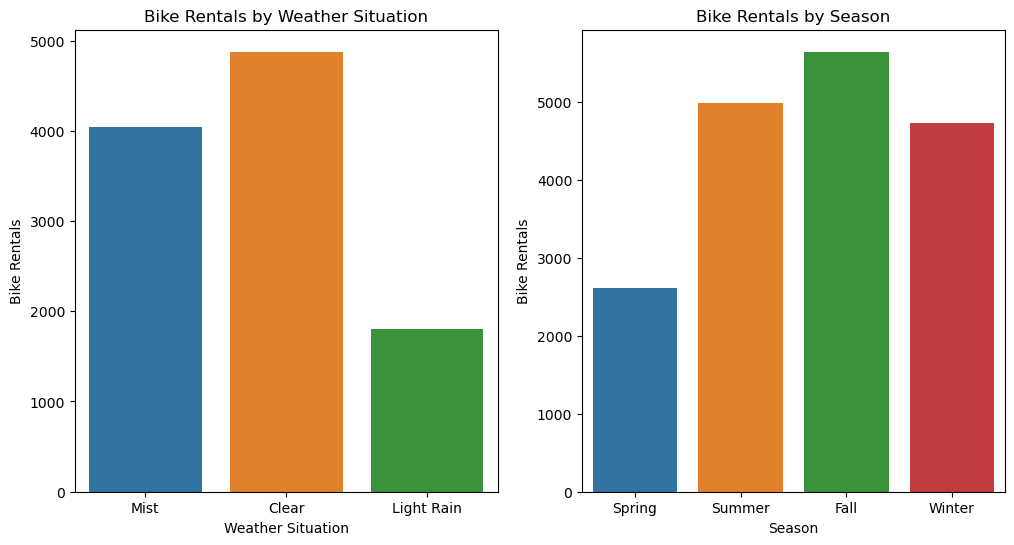

In [9]:
plt.figure(figsize=(12, 6))

# Relationship between weathersit and bike rentals (cnt)
plt.subplot(1, 2, 1)
sns.barplot(x='weathersit', y='cnt', data=bike_dataframe_converted, ci=None)
plt.title('Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Bike Rentals')

# Relationship between season and bike rentals (cnt)
plt.subplot(1, 2, 2)
sns.barplot(x='season', y='cnt', data=bike_dataframe_converted, ci=None)
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Bike Rentals')

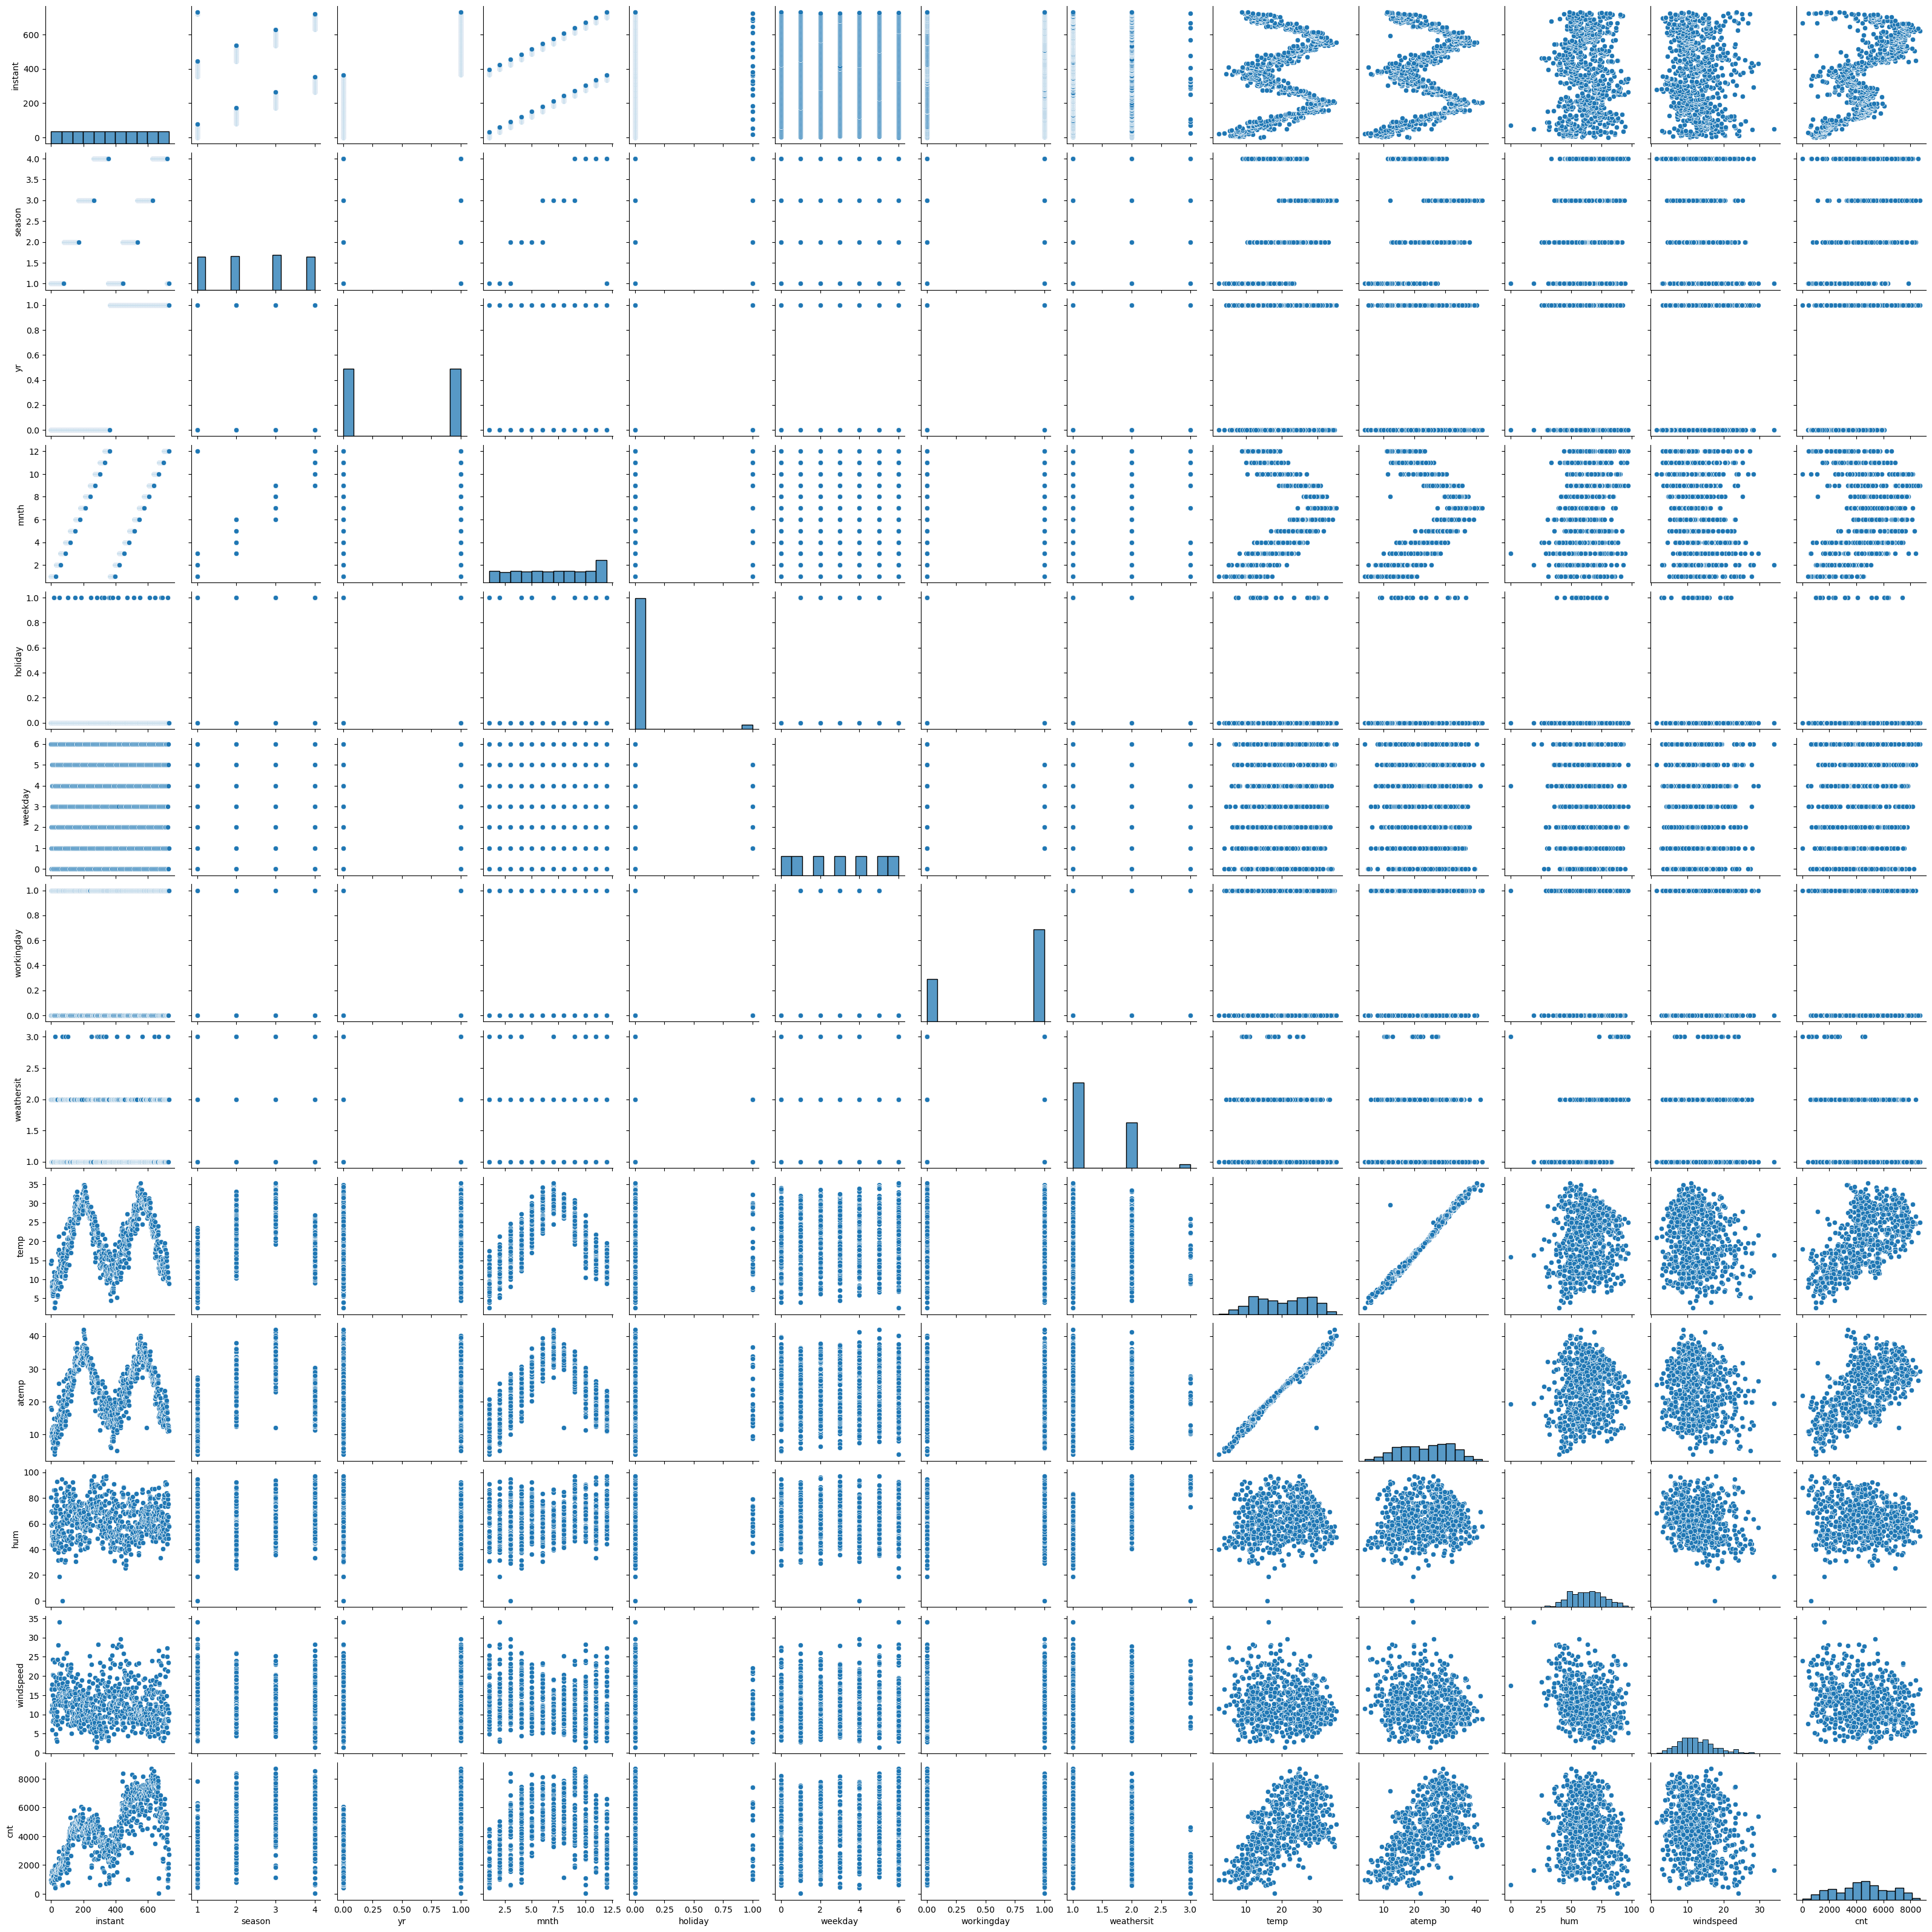

In [10]:
#Visualising
sns.pairplot(bike_dataframe)
plt.show()

In [11]:
# Filter non-integer columns
integer_columns = bike_dataframe.select_dtypes(include=['int64', 'float64']).columns


In [12]:
integer_columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [13]:
bike_dataframe[integer_columns].corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685


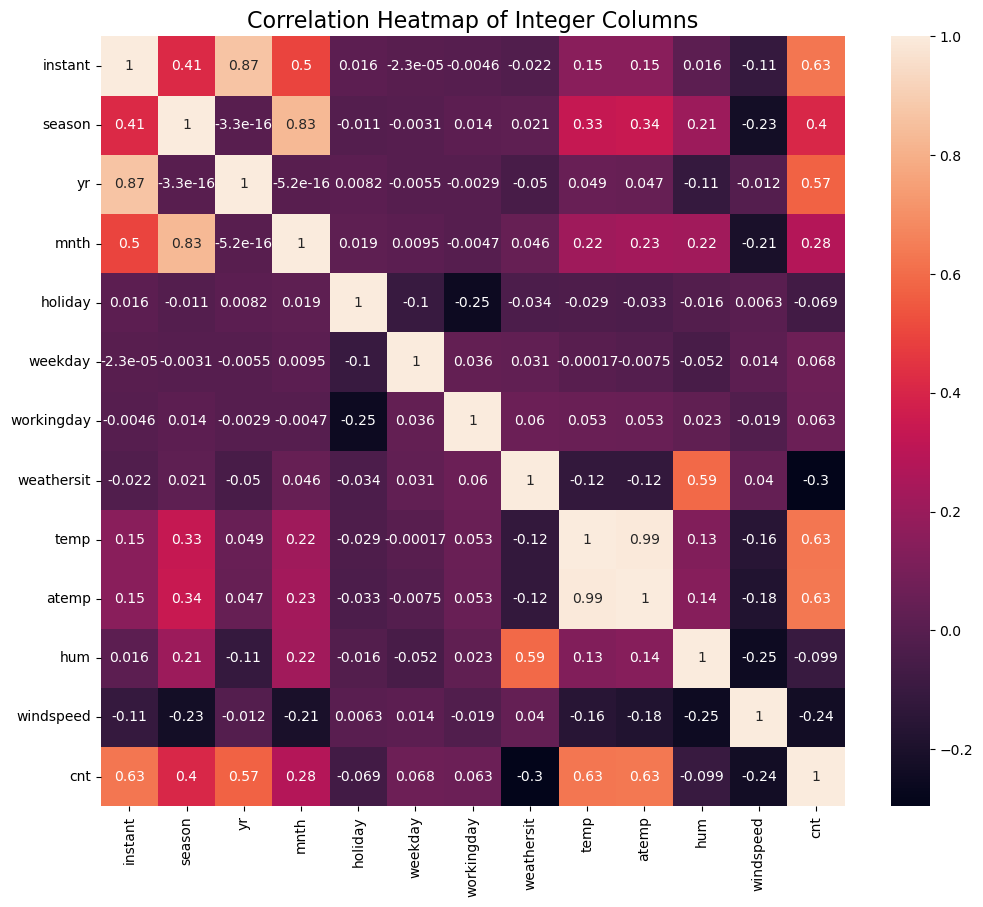

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(bike_dataframe[integer_columns].corr(), annot=True)
plt.title('Correlation Heatmap of Integer Columns', fontsize=16)
plt.show()

## 5. Prepare data for model building

In [15]:
bike_dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:

# Convert 'dteday' to DateTime
bike_dataframe['dteday'] = pd.to_datetime(bike_dataframe['dteday'], format='%d-%m-%Y')

# Extract date components
bike_dataframe['day'] = bike_dataframe['dteday'].dt.day
bike_dataframe['month'] = bike_dataframe['dteday'].dt.month
bike_dataframe['year'] = bike_dataframe['dteday'].dt.year
bike_dataframe['day_of_week'] = bike_dataframe['dteday'].dt.dayofweek  # Monday=0, Sunday=6

In [17]:
bike_dataframe = bike_dataframe.drop(['dteday'], axis=1)

In [18]:
bike_dataframe.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,month,year,day_of_week
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,1,2018,0
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2,1,2018,1
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3,1,2018,2
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4,1,2018,3
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5,1,2018,4


## 6. Model Building using Stats models

In [19]:
# Select features and target variable
X = bike_dataframe.drop('cnt', axis=1) # Features
y = bike_dataframe['cnt']  # Target variable

In [20]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)


In [21]:
# Add intercept to the features
X_train_sm = sm.add_constant(X_train)

# Fit the linear regression model using statsmodels
model=sm.OLS(y_train, X_train_sm)
lr_model = model.fit()

In [23]:
# Summary of the model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     149.0
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.97e-167
Time:                        16:22:27   Log-Likelihood:                -4165.7
No. Observations:                 510   AIC:                             8361.
Df Residuals:                     495   BIC:                             8425.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -39.6604     11.917     -3.328      

##### R-squared and Adjusted R-squared: 
The R-squared value is 0.808, indicating that approximately 80.8% of the variance in the dependent variable ('cnt') is explained by the independent variables in the model. The Adjusted R-squared (0.803) considers the number of predictors in the model and penalizes for adding irrelevant predictors.

##### F-statistic and Prob (F-statistic): 
The F-statistic tests the overall significance of the model. Here, the F-statistic is 149.0 with a very low p-value (2.97e-167), suggesting that the overall model is statistically significant.

##### Coefficients and p-values: 
The coefficients represent the estimated impact of each independent variable on the dependent variable 'cnt'. The p-values associated with the coefficients indicate their statistical significance. A p-value less than the chosen significance level (often 0.05) suggests that the corresponding variable is statistically significant. For example, variables like 'season', 'yr', 'mnth', 'weathersit', 'windspeed', 'day', 'month', and 'year' have p-values less than 0.05, indicating their significance.

##### Significance of Coefficients: 
Some coefficients have high p-values (e.g., 'day_of_week', 'atemp', 'workingday', 'temp'), suggesting they might not be statistically significant in predicting 'cnt' at the chosen significance level.

##### Multicollinearity: 
The 'Cond. No.' value indicates potential multicollinearity issues among the predictors. Multicollinearity occurs when independent variables in a regression model are highly correlated, which can impact the model's stability and interpretation of coefficients.

In [26]:
# Add constant to the test set
X_test_sm = sm.add_constant(X_test)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_sm)

In [27]:
# Calculate R-squared score
r_squared = r2_score(y_test, y_pred)
print(f'R-squared Score on Test Set: {r_squared}')

R-squared Score on Test Set: 0.798546080578047


In [35]:
# Drop less significant variable or which has less P-Value( 'day_of_week')
X_train_new = X_train.drop(['day_of_week'], axis=1)
X_test_new = X_test.drop(['day_of_week'], axis=1)

# Add intercept to the features
X_train_sm_new = sm.add_constant(X_train_new)

# Fit the linear regression model using statsmodels
model_new = sm.OLS(y_train, X_train_sm_new)
lr_model_new = model_new.fit()

# Summary of the new model
print(lr_model_new.summary())

# Make predictions on the test set
X_test_sm_new = sm.add_constant(X_test_new)
y_pred_new = lr_model_new.predict(X_test_sm_new)

# Calculate R-squared score
r_squared_new = r2_score(y_test, y_pred_new)
print(f'Improved R-squared Score on Test Set: {r_squared_new}')


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     160.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.36e-168
Time:                        16:44:17   Log-Likelihood:                -4165.8
No. Observations:                 510   AIC:                             8360.
Df Residuals:                     496   BIC:                             8419.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.6483     11.906     -3.330      0.0

In [36]:
# Drop less significant variable or which has less P-Value('temp')
X_train_new = X_train_new.drop(['temp'], axis=1)
X_test_new = X_test_new.drop(['temp'], axis=1)

# Add intercept to the features
X_train_sm_new = sm.add_constant(X_train_new)

# Fit the linear regression model using statsmodels
model_new = sm.OLS(y_train, X_train_sm_new)
lr_model_new = model_new.fit()

# Summary of the new model
print(lr_model_new.summary())

# Make predictions on the test set
X_test_sm_new = sm.add_constant(X_test_new)
y_pred_new = lr_model_new.predict(X_test_sm_new)

# Calculate R-squared score
r_squared_new = r2_score(y_test, y_pred_new)
print(f'Improved R-squared Score on Test Set: {r_squared_new}')


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     173.5
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          5.73e-169
Time:                        16:44:20   Log-Likelihood:                -4167.0
No. Observations:                 510   AIC:                             8360.
Df Residuals:                     497   BIC:                             8415.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.8542     11.921     -3.343      0.0

In [37]:
# Drop less significant variable or which has less P-Value('holiday')
X_train_new = X_train_new.drop(['holiday'], axis=1)
X_test_new = X_test_new.drop(['holiday'], axis=1)

# Add intercept to the features
X_train_sm_new = sm.add_constant(X_train_new)

# Fit the linear regression model using statsmodels
model_new = sm.OLS(y_train, X_train_sm_new)
lr_model_new = model_new.fit()

# Summary of the new model
print(lr_model_new.summary())

# Make predictions on the test set
X_test_sm_new = sm.add_constant(X_test_new)
y_pred_new = lr_model_new.predict(X_test_sm_new)

# Calculate R-squared score
r_squared_new = r2_score(y_test, y_pred_new)
print(f'Improved R-squared Score on Test Set: {r_squared_new}')


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.49e-169
Time:                        16:45:05   Log-Likelihood:                -4168.9
No. Observations:                 510   AIC:                             8362.
Df Residuals:                     498   BIC:                             8413.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.4755     11.874     -3.577      0.0